## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Explore

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mask = df['Spending Score (1-100)'] > 50
df_score = df[mask]
df_score

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
195,196,Female,35,120,79
197,198,Male,32,126,74


In [7]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


## Histogram

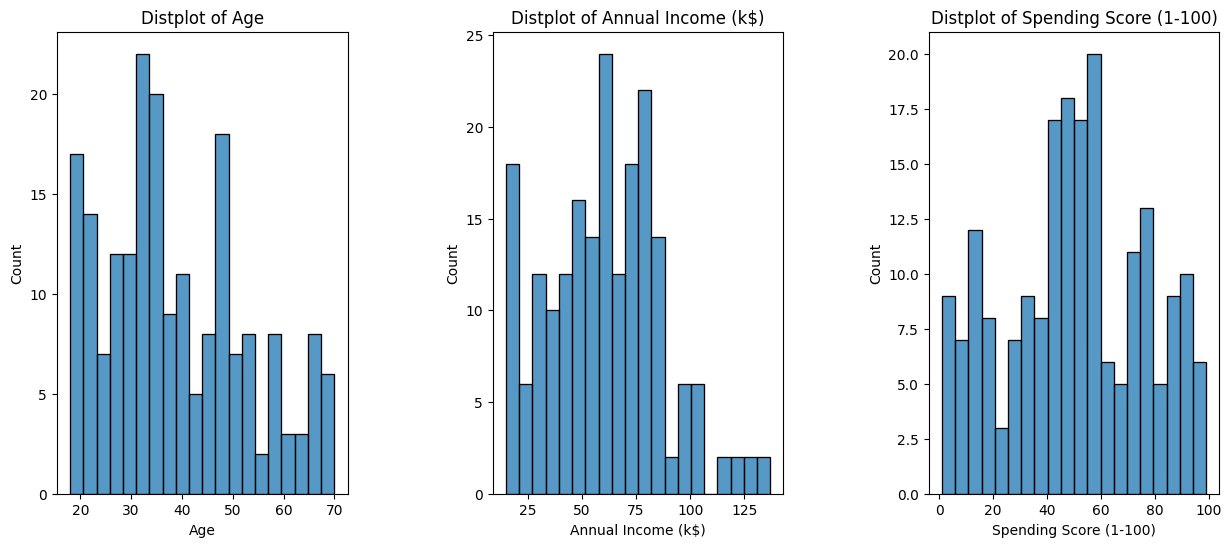

In [8]:
plt.figure(figsize = (15 , 6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show();

these features as they have a little skeweenes are tends to be normally distributed

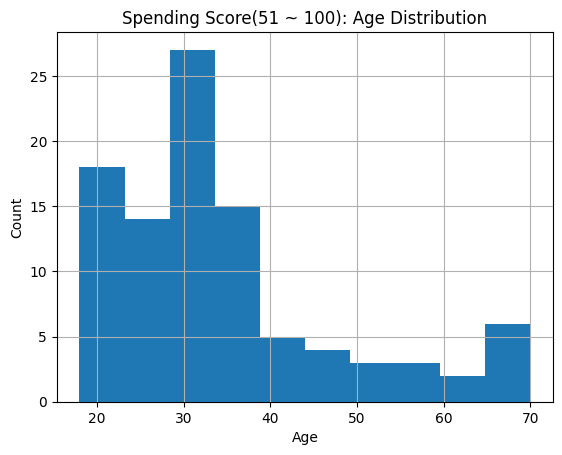

In [9]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

Our histogram is telling us that  many of people who have spending score greater than 50 are younger.

## Count Plot Of Gender

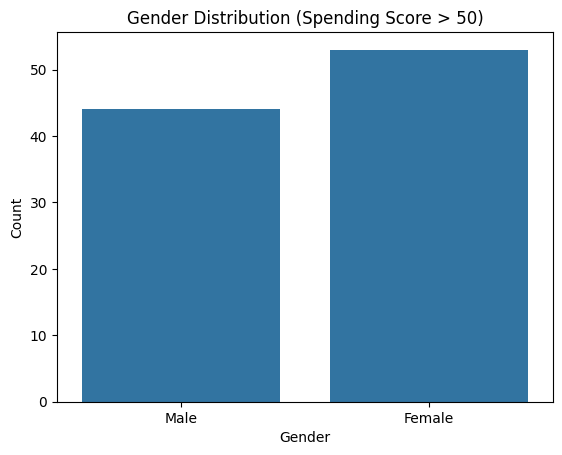

In [10]:
#Q1 plot the gender for spending more than 50
sns.countplot(x='Gender', data=df_score)
plt.title("Gender Distribution (Spending Score > 50)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

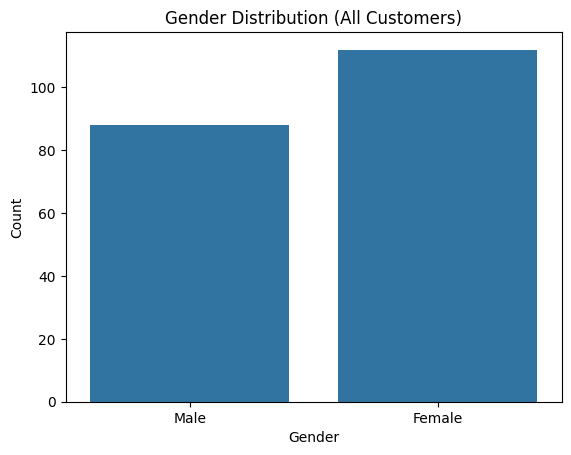

In [11]:
#Q2 plot the gender distribution across the entire data
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution (All Customers)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Split

In [12]:
X = df.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Clustring Using K-Means

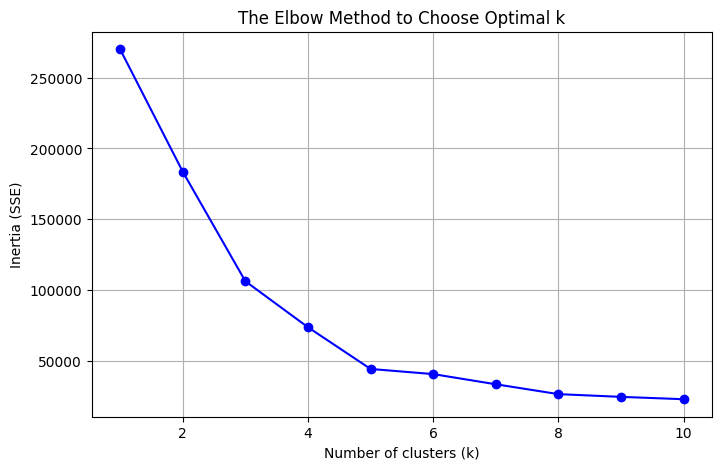

In [13]:
# the elbow to determin K
# Elbow method: Try k from 1 to 10 and calculate SSE
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('The Elbow Method to Choose Optimal k')
plt.grid(True)
plt.show()


The "elbow" typically appears at k=5

In [14]:
#Apply K-Means with Chosen k
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

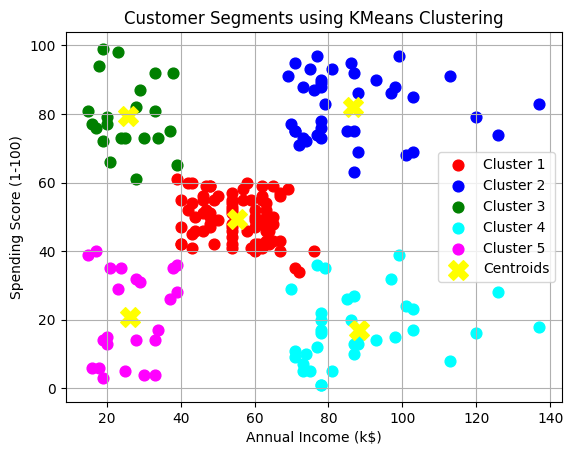

In [15]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

# Plot each cluster using a scatter plot
for i in range(5):  # Assuming we have 5 clusters
    plt.scatter(
        X.values[y_kmeans == i, 0],  # X values of data points in cluster i
        X.values[y_kmeans == i, 1],  # Y values of data points in cluster i
        s=60,                        # Size of points
        c=colors[i],                # Color for the cluster
        label=f'Cluster {i+1}'      # Label for legend
    )

# Plot the centroids of all clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # X coordinates of centroids
    kmeans.cluster_centers_[:, 1],  # Y coordinates of centroids
    s=200,                          # Size of centroid markers
    c='yellow',                     # Color of centroids
    marker='X',                     # Marker style
    label='Centroids'              # Label for legend
)

plt.title('Customer Segments using KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()  
plt.grid(True)  
plt.show()  

In [16]:
print(f"Inertia (SSE): {kmeans.inertia_}")


Inertia (SSE): 44448.45544793371
